In [85]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import torch
from sklearn.model_selection import train_test_split

In [86]:
df=pd.read_csv(r'C:\Users\vedan\Machine Learning\Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [87]:
df['Geography']=df['Geography'].map({'France':0,'Spain':1,'Germany':2})
df['Gender']=df['Gender'].map({'Female':0,'Male':1})
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,1,0,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,1,1,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,0,1,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,2,0,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,0,1,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,0,1,27,2,134603.88,1,1,1,71725.73,0


In [111]:
data=df.drop(columns=['RowNumber','Surname','CustomerId','HasCrCard','Tenure'],axis=1)
print(data.shape)
df.head(10)

(10000, 9)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,1,0,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,1,1,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,0,1,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,2,0,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,0,1,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,0,1,27,2,134603.88,1,1,1,71725.73,0


In [112]:
X=data.drop(columns=['Exited'],axis=1)
y=data['Exited']

In [113]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 8)
(2000, 8)
(8000,)
(2000,)


In [114]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input

In [115]:
tf.random.set_seed(1234)
model=Sequential([
    Input(shape=(8,)),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(16,activation='relu'),
    Dense(1,activation='sigmoid')
])
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_63 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,033 (47.00 KB)

 Trainable params: 12,033 (47.00 KB)

 Non-trainable params: 0 (0.00 B)

In [116]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [117]:
callback=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [118]:
history=model.fit(X_train,y_train,validation_split=0.1,epochs=100,batch_size=256,verbose=1,callbacks=[callback])

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6650 - loss: 162.1957 - val_accuracy: 0.6913 - val_loss: 25.7553
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6639 - loss: 25.5868 - val_accuracy: 0.7812 - val_loss: 17.9097
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6538 - loss: 23.7165 - val_accuracy: 0.8037 - val_loss: 20.6686
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6931 - loss: 21.5708 - val_accuracy: 0.7862 - val_loss: 13.5437
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6725 - loss: 10.5797 - val_accuracy: 0.8037 - val_loss: 13.3261
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6662 - loss: 13.0737 - val_accuracy: 0.6812 - val_loss: 11.8873
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6724 - loss: 10.8887 - val_accuracy: 0.7538 - val_loss: 5.6930
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6685 - loss: 10.4074 - val_accur

In [119]:
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
print(f"Train Accuracy: {train_acc:.4f}")

Train Accuracy: 0.7897


In [120]:
model.evaluate(X_test,y_test,verbose=1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - accuracy: 0.8000 - loss: 2.7847


[2.784694194793701, 0.800000011920929]

In [34]:
import shap
explainer = shap.Explainer(model.predict, X_train[:100])
shap_values = explainer(X_train[:100])

2417/2417 ━━━━━━━━━━━━━━━━━━━━ 1s 439us/step
2467/2467 ━━━━━━━━━━━━━━━━━━━━ 1s 424us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step
2318/2318 ━━━━━━━━━━━━━━━━━━━━ 1s 422us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step
2316/2316 ━━━━━━━━━━━━━━━━━━━━ 1s 417us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step
2475/2475 ━━━━━━━━━━━━━━━━━━━━ 1s 413us/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step
2314/2314 ━━━━━━━━━━━━━━━━━━━━ 1s 415us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step
2420/2420 ━━━━━━━━━━━━━━━━━━━━ 1s 391us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step


ExactExplainer explainer:   7%|▋         | 7/100 [00:00<?, ?it/s]

2417/2417 ━━━━━━━━━━━━━━━━━━━━ 1s 403us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step


ExactExplainer explainer:   9%|▉         | 9/100 [00:11<01:00,  1.50it/s]

2417/2417 ━━━━━━━━━━━━━━━━━━━━ 1s 447us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step


ExactExplainer explainer:  10%|█         | 10/100 [00:13<01:29,  1.00it/s]

2578/2578 ━━━━━━━━━━━━━━━━━━━━ 1s 421us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step


ExactExplainer explainer:  11%|█         | 11/100 [00:14<01:47,  1.21s/it]

2626/2626 ━━━━━━━━━━━━━━━━━━━━ 1s 428us/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step


ExactExplainer explainer:  12%|█▏        | 12/100 [00:16<01:58,  1.35s/it]

2260/2260 ━━━━━━━━━━━━━━━━━━━━ 1s 437us/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step


ExactExplainer explainer:  13%|█▎        | 13/100 [00:17<01:59,  1.37s/it]

2425/2425 ━━━━━━━━━━━━━━━━━━━━ 1s 417us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step


ExactExplainer explainer:  14%|█▍        | 14/100 [00:19<02:00,  1.40s/it]

2256/2256 ━━━━━━━━━━━━━━━━━━━━ 1s 419us/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step


ExactExplainer explainer:  15%|█▌        | 15/100 [00:20<01:58,  1.40s/it]

2416/2416 ━━━━━━━━━━━━━━━━━━━━ 1s 412us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step


ExactExplainer explainer:  16%|█▌        | 16/100 [00:21<01:58,  1.41s/it]

2420/2420 ━━━━━━━━━━━━━━━━━━━━ 1s 390us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step


ExactExplainer explainer:  17%|█▋        | 17/100 [00:23<01:54,  1.38s/it]

2636/2636 ━━━━━━━━━━━━━━━━━━━━ 1s 391us/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step


ExactExplainer explainer:  18%|█▊        | 18/100 [00:24<01:56,  1.42s/it]

2319/2319 ━━━━━━━━━━━━━━━━━━━━ 1s 390us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step


ExactExplainer explainer:  19%|█▉        | 19/100 [00:26<01:53,  1.40s/it]

2318/2318 ━━━━━━━━━━━━━━━━━━━━ 1s 401us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step


ExactExplainer explainer:  20%|██        | 20/100 [00:27<01:49,  1.37s/it]

2475/2475 ━━━━━━━━━━━━━━━━━━━━ 1s 425us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step


ExactExplainer explainer:  21%|██        | 21/100 [00:28<01:49,  1.39s/it]

2463/2463 ━━━━━━━━━━━━━━━━━━━━ 1s 421us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step


ExactExplainer explainer:  22%|██▏       | 22/100 [00:30<01:50,  1.42s/it]

2257/2257 ━━━━━━━━━━━━━━━━━━━━ 1s 406us/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step


ExactExplainer explainer:  23%|██▎       | 23/100 [00:31<01:47,  1.39s/it]

2306/2306 ━━━━━━━━━━━━━━━━━━━━ 1s 405us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step


ExactExplainer explainer:  24%|██▍       | 24/100 [00:33<01:45,  1.39s/it]

2315/2315 ━━━━━━━━━━━━━━━━━━━━ 1s 402us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step


ExactExplainer explainer:  25%|██▌       | 25/100 [00:34<01:43,  1.38s/it]

2427/2427 ━━━━━━━━━━━━━━━━━━━━ 1s 406us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step


ExactExplainer explainer:  26%|██▌       | 26/100 [00:35<01:43,  1.40s/it]

2319/2319 ━━━━━━━━━━━━━━━━━━━━ 1s 413us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step


ExactExplainer explainer:  27%|██▋       | 27/100 [00:37<01:40,  1.37s/it]

2308/2308 ━━━━━━━━━━━━━━━━━━━━ 1s 415us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step


ExactExplainer explainer:  28%|██▊       | 28/100 [00:38<01:39,  1.38s/it]

2321/2321 ━━━━━━━━━━━━━━━━━━━━ 1s 431us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step


ExactExplainer explainer:  29%|██▉       | 29/100 [00:39<01:39,  1.40s/it]

2429/2429 ━━━━━━━━━━━━━━━━━━━━ 1s 416us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step


ExactExplainer explainer:  30%|███       | 30/100 [00:41<01:38,  1.41s/it]

2419/2419 ━━━━━━━━━━━━━━━━━━━━ 1s 410us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step


ExactExplainer explainer:  31%|███       | 31/100 [00:42<01:38,  1.42s/it]

2427/2427 ━━━━━━━━━━━━━━━━━━━━ 1s 414us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step


ExactExplainer explainer:  32%|███▏      | 32/100 [00:44<01:35,  1.41s/it]

2427/2427 ━━━━━━━━━━━━━━━━━━━━ 1s 409us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step


ExactExplainer explainer:  33%|███▎      | 33/100 [00:45<01:33,  1.39s/it]

2477/2477 ━━━━━━━━━━━━━━━━━━━━ 1s 411us/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step


ExactExplainer explainer:  34%|███▍      | 34/100 [00:47<01:33,  1.42s/it]

2316/2316 ━━━━━━━━━━━━━━━━━━━━ 1s 464us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step


ExactExplainer explainer:  35%|███▌      | 35/100 [00:48<01:32,  1.42s/it]

2419/2419 ━━━━━━━━━━━━━━━━━━━━ 1s 471us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step


ExactExplainer explainer:  36%|███▌      | 36/100 [00:50<01:33,  1.46s/it]

2627/2627 ━━━━━━━━━━━━━━━━━━━━ 1s 433us/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step


ExactExplainer explainer:  37%|███▋      | 37/100 [00:51<01:35,  1.52s/it]

2257/2257 ━━━━━━━━━━━━━━━━━━━━ 1s 411us/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step


ExactExplainer explainer:  38%|███▊      | 38/100 [00:53<01:29,  1.45s/it]

2270/2270 ━━━━━━━━━━━━━━━━━━━━ 1s 415us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step


ExactExplainer explainer:  39%|███▉      | 39/100 [00:54<01:27,  1.43s/it]

2477/2477 ━━━━━━━━━━━━━━━━━━━━ 1s 443us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step


ExactExplainer explainer:  40%|████      | 40/100 [00:55<01:27,  1.46s/it]

2417/2417 ━━━━━━━━━━━━━━━━━━━━ 1s 450us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step


ExactExplainer explainer:  41%|████      | 41/100 [00:57<01:26,  1.46s/it]

2468/2468 ━━━━━━━━━━━━━━━━━━━━ 1s 437us/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step


ExactExplainer explainer:  42%|████▏     | 42/100 [00:58<01:26,  1.50s/it]

2478/2478 ━━━━━━━━━━━━━━━━━━━━ 1s 435us/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step


ExactExplainer explainer:  43%|████▎     | 43/100 [01:00<01:26,  1.52s/it]

2315/2315 ━━━━━━━━━━━━━━━━━━━━ 1s 428us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step


ExactExplainer explainer:  44%|████▍     | 44/100 [01:01<01:22,  1.47s/it]

2257/2257 ━━━━━━━━━━━━━━━━━━━━ 1s 418us/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step


ExactExplainer explainer:  45%|████▌     | 45/100 [01:03<01:18,  1.42s/it]

2308/2308 ━━━━━━━━━━━━━━━━━━━━ 1s 425us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step


ExactExplainer explainer:  46%|████▌     | 46/100 [01:04<01:15,  1.40s/it]

2418/2418 ━━━━━━━━━━━━━━━━━━━━ 1s 422us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step


ExactExplainer explainer:  47%|████▋     | 47/100 [01:06<01:15,  1.43s/it]

2417/2417 ━━━━━━━━━━━━━━━━━━━━ 1s 411us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step


ExactExplainer explainer:  48%|████▊     | 48/100 [01:07<01:16,  1.47s/it]

2322/2322 ━━━━━━━━━━━━━━━━━━━━ 1s 408us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step


ExactExplainer explainer:  49%|████▉     | 49/100 [01:08<01:13,  1.45s/it]

2306/2306 ━━━━━━━━━━━━━━━━━━━━ 1s 413us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step


ExactExplainer explainer:  50%|█████     | 50/100 [01:10<01:10,  1.41s/it]

2258/2258 ━━━━━━━━━━━━━━━━━━━━ 1s 430us/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step


ExactExplainer explainer:  51%|█████     | 51/100 [01:11<01:08,  1.41s/it]

2262/2262 ━━━━━━━━━━━━━━━━━━━━ 1s 403us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step


ExactExplainer explainer:  52%|█████▏    | 52/100 [01:13<01:06,  1.39s/it]

2255/2255 ━━━━━━━━━━━━━━━━━━━━ 1s 413us/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step


ExactExplainer explainer:  53%|█████▎    | 53/100 [01:14<01:05,  1.39s/it]

2417/2417 ━━━━━━━━━━━━━━━━━━━━ 1s 420us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step


ExactExplainer explainer:  54%|█████▍    | 54/100 [01:15<01:03,  1.39s/it]

2474/2474 ━━━━━━━━━━━━━━━━━━━━ 1s 430us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step


ExactExplainer explainer:  55%|█████▌    | 55/100 [01:17<01:04,  1.43s/it]

2479/2479 ━━━━━━━━━━━━━━━━━━━━ 1s 419us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step


ExactExplainer explainer:  56%|█████▌    | 56/100 [01:18<01:04,  1.46s/it]

2306/2306 ━━━━━━━━━━━━━━━━━━━━ 1s 424us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step


ExactExplainer explainer:  57%|█████▋    | 57/100 [01:20<01:01,  1.42s/it]

2416/2416 ━━━━━━━━━━━━━━━━━━━━ 1s 431us/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step


ExactExplainer explainer:  58%|█████▊    | 58/100 [01:21<00:59,  1.42s/it]

2308/2308 ━━━━━━━━━━━━━━━━━━━━ 1s 425us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step


ExactExplainer explainer:  59%|█████▉    | 59/100 [01:22<00:57,  1.40s/it]

2478/2478 ━━━━━━━━━━━━━━━━━━━━ 1s 427us/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step


ExactExplainer explainer:  60%|██████    | 60/100 [01:24<00:56,  1.41s/it]

2469/2469 ━━━━━━━━━━━━━━━━━━━━ 1s 419us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step


ExactExplainer explainer:  61%|██████    | 61/100 [01:25<00:56,  1.44s/it]

2259/2259 ━━━━━━━━━━━━━━━━━━━━ 1s 420us/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step


ExactExplainer explainer:  62%|██████▏   | 62/100 [01:27<00:54,  1.43s/it]

2469/2469 ━━━━━━━━━━━━━━━━━━━━ 1s 426us/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step


ExactExplainer explainer:  63%|██████▎   | 63/100 [01:30<01:07,  1.81s/it]

2267/2267 ━━━━━━━━━━━━━━━━━━━━ 1s 436us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step


ExactExplainer explainer:  64%|██████▍   | 64/100 [01:31<01:01,  1.72s/it]

2316/2316 ━━━━━━━━━━━━━━━━━━━━ 1s 448us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step


ExactExplainer explainer:  65%|██████▌   | 65/100 [01:32<00:57,  1.64s/it]

2568/2568 ━━━━━━━━━━━━━━━━━━━━ 1s 408us/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step


ExactExplainer explainer:  66%|██████▌   | 66/100 [01:34<00:54,  1.61s/it]

2418/2418 ━━━━━━━━━━━━━━━━━━━━ 1s 406us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step


ExactExplainer explainer:  67%|██████▋   | 67/100 [01:35<00:50,  1.54s/it]

2637/2637 ━━━━━━━━━━━━━━━━━━━━ 1s 415us/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step


ExactExplainer explainer:  68%|██████▊   | 68/100 [01:37<00:49,  1.55s/it]

2587/2587 ━━━━━━━━━━━━━━━━━━━━ 1s 430us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step


ExactExplainer explainer:  69%|██████▉   | 69/100 [01:39<00:48,  1.57s/it]

2469/2469 ━━━━━━━━━━━━━━━━━━━━ 1s 422us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step


ExactExplainer explainer:  70%|███████   | 70/100 [01:40<00:45,  1.53s/it]

2305/2305 ━━━━━━━━━━━━━━━━━━━━ 1s 431us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step


ExactExplainer explainer:  71%|███████   | 71/100 [01:41<00:43,  1.50s/it]

2637/2637 ━━━━━━━━━━━━━━━━━━━━ 1s 417us/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step


ExactExplainer explainer:  72%|███████▏  | 72/100 [01:43<00:42,  1.51s/it]

2257/2257 ━━━━━━━━━━━━━━━━━━━━ 1s 435us/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step


ExactExplainer explainer:  73%|███████▎  | 73/100 [01:44<00:39,  1.46s/it]

2637/2637 ━━━━━━━━━━━━━━━━━━━━ 1s 411us/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step


ExactExplainer explainer:  74%|███████▍  | 74/100 [01:46<00:38,  1.47s/it]

2270/2270 ━━━━━━━━━━━━━━━━━━━━ 1s 415us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step


ExactExplainer explainer:  75%|███████▌  | 75/100 [01:47<00:35,  1.42s/it]

2402/2402 ━━━━━━━━━━━━━━━━━━━━ 1s 414us/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step


ExactExplainer explainer:  76%|███████▌  | 76/100 [01:49<00:34,  1.43s/it]

2318/2318 ━━━━━━━━━━━━━━━━━━━━ 1s 414us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step


ExactExplainer explainer:  77%|███████▋  | 77/100 [01:50<00:32,  1.40s/it]

2267/2267 ━━━━━━━━━━━━━━━━━━━━ 1s 419us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step


ExactExplainer explainer:  78%|███████▊  | 78/100 [01:51<00:30,  1.37s/it]

2577/2577 ━━━━━━━━━━━━━━━━━━━━ 1s 423us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step


ExactExplainer explainer:  79%|███████▉  | 79/100 [01:53<00:30,  1.44s/it]

2315/2315 ━━━━━━━━━━━━━━━━━━━━ 1s 418us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step


ExactExplainer explainer:  80%|████████  | 80/100 [01:54<00:28,  1.41s/it]

2478/2478 ━━━━━━━━━━━━━━━━━━━━ 1s 418us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step


ExactExplainer explainer:  81%|████████  | 81/100 [01:56<00:26,  1.42s/it]

2356/2356 ━━━━━━━━━━━━━━━━━━━━ 1s 431us/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step


ExactExplainer explainer:  82%|████████▏ | 82/100 [01:57<00:25,  1.44s/it]

2417/2417 ━━━━━━━━━━━━━━━━━━━━ 1s 442us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step


ExactExplainer explainer:  83%|████████▎ | 83/100 [01:59<00:24,  1.45s/it]

2419/2419 ━━━━━━━━━━━━━━━━━━━━ 1s 426us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step


ExactExplainer explainer:  84%|████████▍ | 84/100 [02:00<00:22,  1.44s/it]

2268/2268 ━━━━━━━━━━━━━━━━━━━━ 1s 436us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step


ExactExplainer explainer:  85%|████████▌ | 85/100 [02:01<00:21,  1.43s/it]

2628/2628 ━━━━━━━━━━━━━━━━━━━━ 1s 419us/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step


ExactExplainer explainer:  86%|████████▌ | 86/100 [02:03<00:20,  1.49s/it]

2260/2260 ━━━━━━━━━━━━━━━━━━━━ 1s 443us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step


ExactExplainer explainer:  87%|████████▋ | 87/100 [02:04<00:18,  1.45s/it]

2625/2625 ━━━━━━━━━━━━━━━━━━━━ 1s 454us/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step


ExactExplainer explainer:  88%|████████▊ | 88/100 [02:06<00:18,  1.52s/it]

2419/2419 ━━━━━━━━━━━━━━━━━━━━ 1s 447us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step


ExactExplainer explainer:  89%|████████▉ | 89/100 [02:08<00:16,  1.51s/it]

2639/2639 ━━━━━━━━━━━━━━━━━━━━ 1s 459us/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step


ExactExplainer explainer:  90%|█████████ | 90/100 [02:09<00:15,  1.57s/it]

2431/2431 ━━━━━━━━━━━━━━━━━━━━ 1s 434us/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step


ExactExplainer explainer:  91%|█████████ | 91/100 [02:11<00:14,  1.56s/it]

2417/2417 ━━━━━━━━━━━━━━━━━━━━ 1s 420us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step


ExactExplainer explainer:  92%|█████████▏| 92/100 [02:12<00:12,  1.51s/it]

2479/2479 ━━━━━━━━━━━━━━━━━━━━ 1s 416us/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step


ExactExplainer explainer:  93%|█████████▎| 93/100 [02:14<00:10,  1.49s/it]

2418/2418 ━━━━━━━━━━━━━━━━━━━━ 1s 412us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step


ExactExplainer explainer:  94%|█████████▍| 94/100 [02:15<00:08,  1.45s/it]

2255/2255 ━━━━━━━━━━━━━━━━━━━━ 1s 420us/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step


ExactExplainer explainer:  95%|█████████▌| 95/100 [02:16<00:07,  1.41s/it]

2429/2429 ━━━━━━━━━━━━━━━━━━━━ 1s 450us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step


ExactExplainer explainer:  96%|█████████▌| 96/100 [02:18<00:05,  1.43s/it]

2474/2474 ━━━━━━━━━━━━━━━━━━━━ 1s 428us/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step


ExactExplainer explainer:  97%|█████████▋| 97/100 [02:19<00:04,  1.44s/it]

2270/2270 ━━━━━━━━━━━━━━━━━━━━ 1s 435us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step


ExactExplainer explainer:  98%|█████████▊| 98/100 [02:21<00:02,  1.42s/it]

2256/2256 ━━━━━━━━━━━━━━━━━━━━ 1s 427us/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step


ExactExplainer explainer:  99%|█████████▉| 99/100 [02:22<00:01,  1.39s/it]

2313/2313 ━━━━━━━━━━━━━━━━━━━━ 1s 437us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step


ExactExplainer explainer: 100%|██████████| 100/100 [02:23<00:00,  1.41s/it]

2641/2641 ━━━━━━━━━━━━━━━━━━━━ 1s 410us/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step


ExactExplainer explainer: 101it [02:25,  1.55s/it]                         


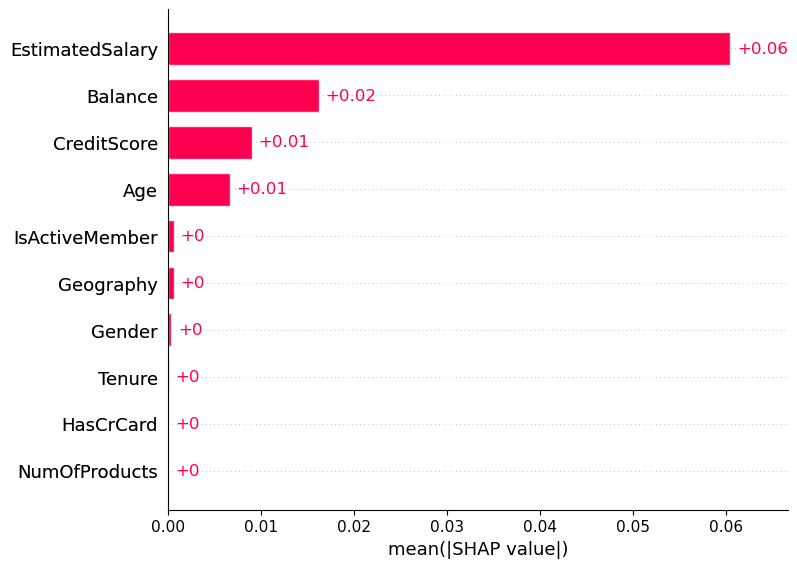

In [35]:
shap.plots.bar(shap_values)